In [ ]:
import pandas as pd
import os

train = pd.read_csv("/content/house_prices_data/train.csv")
test = pd.read_csv("/content/house_prices_data/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Info about datatypes and missing values
train.info()

# Check how many missing values per column
missing = train.isnull().sum().sort_values(ascending=False)
missing[0:20]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


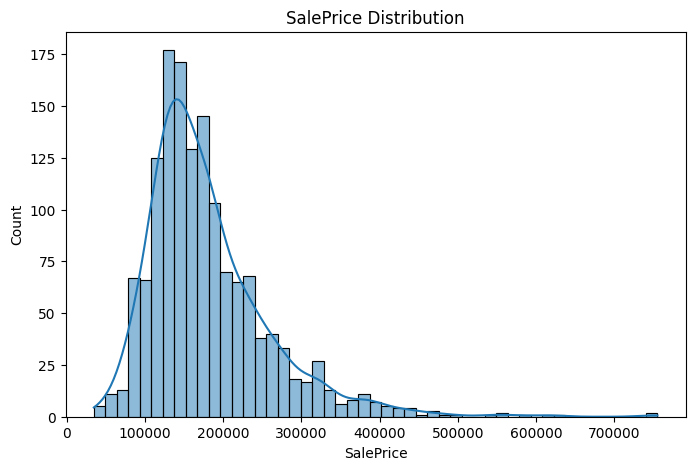

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(train["SalePrice"], kde=True)
plt.title("SalePrice Distribution")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Drop Id (not useful for prediction)
train.drop("Id", axis=1, inplace=True)
test_ids = test["Id"]
test.drop("Id", axis=1, inplace=True)

# Separate target
y = train["SalePrice"]
X = train.drop("SalePrice", axis=1)

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(exclude=[np.number]).columns

# Fill missing values
imputer_num = SimpleImputer(strategy="median")
imputer_cat = SimpleImputer(strategy="most_frequent")

X[num_cols] = imputer_num.fit_transform(X[num_cols])
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

test[num_cols] = imputer_num.transform(test[num_cols])
test[cat_cols] = imputer_cat.transform(test[cat_cols])

# Encode categorical variables
for col in cat_cols:
    lbl = LabelEncoder()
    X[col] = lbl.fit_transform(X[col])
    test[col] = lbl.transform(test[col])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_valid.shape)


Train shape: (1168, 79)
Validation shape: (292, 79)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_valid)
print("Linear Regression R²:", r2_score(y_valid, lr_pred))

# --- Random Forest ---
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_valid)
print("Random Forest R²:", r2_score(y_valid, rf_pred))


Linear Regression R²: 0.8374323228511418
Random Forest R²: 0.894433693355112


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_valid, rf_pred)
rmse = np.sqrt(mean_squared_error(y_valid, rf_pred))  # <-- manual sqrt
r2 = r2_score(y_valid, rf_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)



MAE: 17575.508202054796
RMSE: 28455.720135927622
R² Score: 0.894433693355112


In [ ]:
# Predict house prices on the test dataset using Random Forest
final_preds = rf.predict(test)

# Create submission DataFrame
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": final_preds
})

# Save as CSV
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv is ready!")

# Show sample predictions
submission.head(10)


✅ submission.csv is ready!


,Id,SalePrice
0,1461,126340.915
1,1462,154504.250
2,1463,179247.355
3,1464,183661.595
4,1465,207400.730
5,1466,181543.685
6,1467,174282.865
7,1468,175489.435
8,1469,177510.940
9,1470,119171.800


In [ ]:
import joblib
joblib.dump(rf, "house_price_model.pkl")
print("Model saved as house_price_model.pkl")


Model saved as house_price_model.pkl
